# Look into rnas for Mary - Mar 22, 2024

In [1]:
from Bio import SeqIO

import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from override import GENE_NAME_OVERRIDE, GENE_PRODUCT_OVERRIDE
import utils as u

In [5]:
# get feature info from genbank

def get_override_gene(locus_tag,cur_gene):
    '''
    Given a locus tag, return an overridden gene
    '''
    return GENE_NAME_OVERRIDE[locus_tag] if locus_tag in GENE_NAME_OVERRIDE else cur_gene

def get_override_product(locus_tag,cur_prod):
    '''
    Given a locus tag, return an overridden gene
    '''
    return GENE_PRODUCT_OVERRIDE[locus_tag] if locus_tag in GENE_PRODUCT_OVERRIDE else cur_prod

def get_feat2meta_dict(genbank_path):
    '''
    Given a genbank file, parse it and return a dictionary of locus and the 
    gene, product and type fields
    '''
    seq_record = SeqIO.parse(genbank_path, "genbank").__next__()
    feat_list = []
    # Loop over the genome file, get the features on each of the strands
    for feature in seq_record.features:
        if feature.type != 'gene': # exclude 'gene' wrapper type
            if 'locus_tag' in feature.qualifiers: # exclude features without a locus tag
                # get  locus tag, feature name and product
                lt = feature.qualifiers['locus_tag'][0]
                g = "" if 'gene' not in feature.qualifiers else feature.qualifiers['gene'][0]
                prod = "" if 'product' not in feature.qualifiers else feature.qualifiers['product'][0]
                t = feature.type
                strand = feature.strand
                seq = str(feature.location.extract(seq_record).seq)

                # overrides
                g = get_override_gene(lt,g)
                prod = get_override_product(lt,prod)

                metadata = {
                    'gene_symbol':g,
                    'product':prod,
                    'type':t,
                    'strand':strand,
                    'seq':seq
                }

                feat_list.append((lt,metadata))

    return dict(feat_list)

In [6]:
gb_file = "data/5GB1c_sequence_20220411.gb"
loc2info = get_feat2meta_dict(gb_file)

loc2info['EQU24_RS19315']

{'gene_symbol': 'pmoC',
 'product': 'methane monooxygenase/ammonia monooxygenase subunit C',
 'type': 'CDS',
 'strand': -1,
 'seq': 'ATGGCTGCTACAACTGAGTCAGTTAAAGCTGATGCTGCAGAAGCACCACTTTTGAACAAAAAAAATATAATTGCCGGTGCATCTTTGTACCTGGTATTTTATGCTTGGGTTCGTTGGTATGAAGGCGTTTATGGCTGGTCCGCCGGTCTTGACTCTTTCGCTCCGGAATTCGAAACTTACTGGATGAACTTCCTGTACATCGAAATGGTTCTGGAAGTATTGACAGCTTCTATCTTGTGGGGTTATATCTGGAAAACTCGTGATCGTAAAGTGATGTCAATCACTCCACGTGAAGAGTTGAGAAGACATTTTACTCACTGGACATGGCTAATGATGTACGGCATCGCGATCTACTTCGGTGCTAGCTACTTCACAGAGCAAGACGGTACATGGCATCAAACCATCGTACGTGATACTGACTTCACTCCAAGTCATATCATTGAGTTCTACTTGAGCTACCCAATCTATATCATCACTGGTGGCGCTTCTTTCTTGTACGCTAAAACAAGACTTCCAACTTACCAACAAGGTTTGTCTCTGCAATACCTGGTTGTTGTTGTAGGTCCATTCATGATTCTGCCAAACGTTGGTTTGAACGAGTGGGGTCATACTTTCTGGTTTATGGAAGAATTGTTTGTTGCTCCTCTGCACTATGGTTTCGTCTTCTTCGGATGGTCGGCTCTGGGTGTATTGGGTGTAATCAACATCGAGTTGGGCGCATTGTCCAAGCTGCTGAAAAAAGACTTAGCATAA'}

In [7]:
# not in tpm df?
#tpm_file = 'data/extract_TPM_counts.tsv'
tpm_file = 'data/5GB1_tpms_20221031.tsv'
og_tpm_df = pd.read_csv(tpm_file,sep='\t').fillna("")
og_tpm_df.head()

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,gene_len,5GB1_ferm_Ack_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,1318,2.920380,...,38.638102,31.867873,30.546267,36.840627,29.198516,35.405768,56.747208,55.734395,46.812595,35.325741
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,dnaN,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,1102,1.600865,...,45.092244,45.889651,34.824076,44.661748,35.864388,45.409001,32.721559,33.467532,34.906928,30.020538
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,1081,1.409423,...,21.362765,20.976809,17.355043,21.854708,18.734014,25.608242,26.409599,23.529439,21.368579,16.896055
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,2416,3.186309,...,57.478160,61.623220,52.941842,63.050677,55.592843,58.631387,48.167231,51.249206,61.811500,54.226180
4,EQU24_RS00035,hypothetical protein,CDS,,NZ_CP035467.1,7350,7734,Derived by automated computational analysis us...,385,8.852007,...,118.910610,106.287739,102.200487,116.972791,105.924563,129.975893,86.942252,83.059104,118.967455,94.451247


# prepare TPM df 
1. remove low expression genes
1. log normalize to average of uMax

In [8]:
# mapping of samples to conditions
sample2cond_file = 'data/sample2condition.txt'
with open(sample2cond_file,'r') as f:
    sample2cond = dict(x.strip().split() for x in f.readlines())
    
# just the conditions we want to include
cond_file = "data/conditions_to_include_20221031.txt"
with open(cond_file,'r') as f:
    conds = [x.strip() for x in f.readlines()]
    
# samples from only the conditions to include
samples = [x for x in sample2cond.keys() if sample2cond[x] in conds]

In [9]:
# check to exclude some samples from metadata df
meta_df = pd.read_csv('data/5G_exp_metadata.tsv',sep='\t')
meta_df.head()

,exp_theme,exp_condition,#sample,shortd,longd,mutation_locus,bior,techr,path_to_FASTQ,path_to_FASTQ_paired_end,...,secondary_altered_parameters,OD,Dilution rate (per day),Abnormal medium? (NMS2 unless indicated otherwise),O2-stressed,N-stressed,Fe-stressed,Cu-stressed,EPS,marker_for
0,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_Ack_QC,ferm_Ack_QC,Melissa needs to provide details (acetate kinase),MBURv2_60338,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_Ack_QC...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_WT_QC,ferm_WT_QC,Melissa needs to provide details,NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/5GB1_ferm_WT_QC....,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,1.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",NaN,1.0,2,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,1.5,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",NaN,1.0,1,/work/5GB1c_rnaseq/data/fastq/data.htseq.org/U...,NaN,...,NaN,2.4,4.3,NaN,low,NaN,NaN,NaN,NaN,NaN


In [10]:
samples_to_exclude = [x+"_tpm" for x in meta_df[meta_df['include?']==0]['#sample'].values]
samples_to_exclude

['5GB1_FM18_TR1_QC_tpm',
 '5GB1_FM19_TR1_tpm',
 '5GB1_FM22_TR3_tpm',
 '5GB1_FM40_T20m_TR2_QC_tpm',
 'br1_QC_tpm',
 'br2_QC_tpm',
 'ribo0_tpm',
 'total_tpm']

In [11]:
for s in samples_to_exclude:
    if s in samples:
        samples.remove(s)

In [12]:
'5GB1_FM40_T20m_TR2_QC_tpm' in samples

False

In [13]:
### Get tpm df to only those with samples
info_cols = ['locus_tag','product','type','gene_symbol','start_coord','end_coord']
tpm_df = og_tpm_df[info_cols+samples]
tpm_df.head()

,locus_tag,product,type,gene_symbol,start_coord,end_coord,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,0,1317,28.358614,44.473805,20.777639,30.365022,...,38.638102,31.867873,30.546267,36.840627,29.198516,35.405768,56.747208,55.734395,35.325741,46.812595
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,dnaN,1502,2603,29.780875,46.816867,30.027334,34.856148,...,45.092244,45.889651,34.824076,44.661748,35.864388,45.409001,32.721559,33.467532,30.020538,34.906928
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,3060,4140,19.677397,25.543682,17.521963,24.230312,...,21.362765,20.976809,17.355043,21.854708,18.734014,25.608242,26.409599,23.529439,16.896055,21.368579
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,4185,6600,37.481298,61.957785,42.788951,48.332319,...,57.478160,61.623220,52.941842,63.050677,55.592843,58.631387,48.167231,51.249206,54.226180,61.811500
4,EQU24_RS00035,hypothetical protein,CDS,,7350,7734,29.203593,60.711494,47.419790,55.301121,...,118.910610,106.287739,102.200487,116.972791,105.924563,129.975893,86.942252,83.059104,94.451247,118.967455


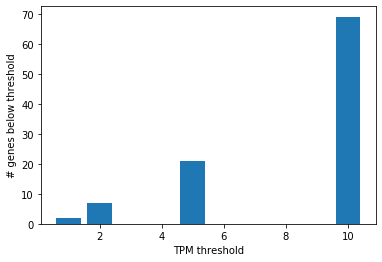

In [14]:
no_tx_genes1 = []
no_tx_genes2 = []
no_tx_genes5 = []
no_tx_genes10 = []
for i, row, in tpm_df.iterrows():
    tpms = row[samples].values
    if max(tpms) < 1.0:
        no_tx_genes1.append(row['locus_tag'])
    if max(tpms) < 2.0:
        no_tx_genes2.append(row['locus_tag'])
    if max(tpms) < 5.0:
        no_tx_genes5.append(row['locus_tag'])
    if max(tpms) < 10.0:
        no_tx_genes10.append(row['locus_tag'])

plt.bar([1,2,5,10],[len(no_tx_genes1),len(no_tx_genes2),len(no_tx_genes5),len(no_tx_genes10)])
plt.xlabel("TPM threshold")
plt.ylabel("# genes below threshold")
plt.show()

In [15]:
og_tpm_df[og_tpm_df['locus_tag'].isin(no_tx_genes2)]

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,gene_len,5GB1_ferm_Ack_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm
1177,EQU24_RS06390,IS66 family transposase,CDS,,NZ_CP035467.1,1400425,1402006,Derived by automated computational analysis us...,1582,0.0,...,1.282277,1.408905,0.810236,1.170442,1.479905,1.255985,0.478344,0.574617,0.524691,0.410511
1373,EQU24_RS07485,IS66 family transposase,CDS,,NZ_CP035467.1,1650361,1651942,Derived by automated computational analysis us...,1582,0.0,...,0.574460,0.337462,0.491052,0.606122,0.684456,0.817000,1.182754,1.364362,1.284959,1.285194
1652,EQU24_RS09050,IS66 family transposase,CDS,,NZ_CP035467.1,2000632,2002213,Derived by automated computational analysis us...,1582,0.0,...,1.446408,1.290793,0.589263,1.086839,1.193174,0.792612,0.874779,0.902970,1.115772,0.823705
3135,EQU24_RS17185,IS66 family transposase,CDS,,NZ_CP035467.1,3856997,3858578,Derived by automated computational analysis us...,1582,0.0,...,0.779624,0.894275,0.613815,0.731526,1.137677,0.829194,1.556255,1.443619,1.441295,1.070548
3588,EQU24_RS19655,IS66 family transposase,CDS,,NZ_CP035467.1,4416746,4418327,Derived by automated computational analysis us...,1582,0.0,...,0.574460,0.632742,0.343737,0.710626,0.702955,0.609701,0.648713,0.438747,0.434744,0.327335
4160,EQU24_RS23000,hypothetical protein,CDS,,NZ_CP035467.1,2663997,2664351,Derived by automated computational analysis us...,355,0.0,...,0.868567,0.375962,0.492366,0.698556,0.824370,1.249836,0.423412,0.428884,0.467640,0.227177
4161,EQU24_RS23005,hypothetical protein,CDS,,NZ_CP035467.1,2664307,2664784,Derived by automated computational analysis us...,478,0.0,...,0.271607,0.055844,0.040630,0.103760,0.030612,0.080715,0.346989,0.543362,0.404009,0.293039


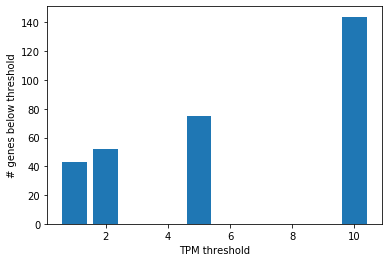

In [16]:
# Previous plot for original df

# no_tx_genes1 = []
# no_tx_genes2 = []
# no_tx_genes5 = []
# no_tx_genes10 = []
# for i, row, in tpm_df.iterrows():
#     tpms = row[samples].values
#     if max(tpms) < 1.0:
#         no_tx_genes1.append(row['locus_tag'])
#     if max(tpms) < 2.0:
#         no_tx_genes2.append(row['locus_tag'])
#     if max(tpms) < 5.0:
#         no_tx_genes5.append(row['locus_tag'])
#     if max(tpms) < 10.0:
#         no_tx_genes10.append(row['locus_tag'])

# plt.bar([1,2,5,10],[len(no_tx_genes1),len(no_tx_genes2),len(no_tx_genes5),len(no_tx_genes10)])
# plt.xlabel("TPM threshold")
# plt.ylabel("# genes below threshold")
# plt.show()

In [16]:
# set all genes with <2 TPM in all conditions to 0.
# this will help ensure that small relative changes of TPM values don't create giant log ratio values
adj_tpm_df = tpm_df.__deepcopy__()

for i, row in adj_tpm_df.iterrows():
    if row['locus_tag'] in no_tx_genes2:
        for s in samples:
            adj_tpm_df.loc[i,s] = 0.0

adj_tpm_df[adj_tpm_df['locus_tag'].isin(no_tx_genes2)][info_cols+samples]

,locus_tag,product,type,gene_symbol,start_coord,end_coord,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
1177,EQU24_RS06390,IS66 family transposase,CDS,,1400425,1402006,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,EQU24_RS07485,IS66 family transposase,CDS,,1650361,1651942,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1652,EQU24_RS09050,IS66 family transposase,CDS,,2000632,2002213,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3135,EQU24_RS17185,IS66 family transposase,CDS,,3856997,3858578,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3588,EQU24_RS19655,IS66 family transposase,CDS,,4416746,4418327,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4160,EQU24_RS23000,hypothetical protein,CDS,,2663997,2664351,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4161,EQU24_RS23005,hypothetical protein,CDS,,2664307,2664784,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
adj_tpm_df.head()

,locus_tag,product,type,gene_symbol,start_coord,end_coord,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,...,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm,5GB1C_CH4_500ppm-Rep1_tpm,5GB1C_CH4_500ppm-Rep2_tpm,5GB1C_CH4_1000ppm-Rep1_tpm,5GB1C_CH4_1000ppm-Rep2_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,0,1317,28.358614,44.473805,20.777639,30.365022,...,38.638102,31.867873,30.546267,36.840627,29.198516,35.405768,56.747208,55.734395,35.325741,46.812595
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,dnaN,1502,2603,29.780875,46.816867,30.027334,34.856148,...,45.092244,45.889651,34.824076,44.661748,35.864388,45.409001,32.721559,33.467532,30.020538,34.906928
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,3060,4140,19.677397,25.543682,17.521963,24.230312,...,21.362765,20.976809,17.355043,21.854708,18.734014,25.608242,26.409599,23.529439,16.896055,21.368579
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,4185,6600,37.481298,61.957785,42.788951,48.332319,...,57.478160,61.623220,52.941842,63.050677,55.592843,58.631387,48.167231,51.249206,54.226180,61.811500
4,EQU24_RS00035,hypothetical protein,CDS,,7350,7734,29.203593,60.711494,47.419790,55.301121,...,118.910610,106.287739,102.200487,116.972791,105.924563,129.975893,86.942252,83.059104,94.451247,118.967455


### Get TPM means

In [19]:
tpm_means = u.get_gene_means_by_condition(adj_tpm_df,samples,sample2cond)
tpm_meansT = tpm_means.set_index('exp_condition').T.reset_index()

tpm_meansT

exp_condition,locus_tag,CH4_1000ppm,CH4_500ppm,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,medCu,uMax
0,EQU24_RS00005,41.069168,56.240801,24.724827,23.257691,30.475060,35.377855,31.211609,32.606911,25.492734,36.832130,42.388329,62.632333,29.781989,39.218326,34.669364,42.154887,44.579239
1,EQU24_RS00010,32.463733,33.094545,53.749707,18.846665,41.516462,45.599876,40.771423,38.481860,43.167206,49.993709,69.651793,95.735624,32.392422,55.183975,41.694671,60.941472,51.636261
2,EQU24_RS00015,19.132317,24.969519,11.389278,17.750081,20.301406,22.589309,21.573752,19.006705,11.365836,31.545718,29.554291,43.375614,17.858485,25.790528,26.138278,27.579182,29.092185
3,EQU24_RS00020,58.018840,49.708219,74.176070,17.698343,59.215231,43.793864,53.521706,52.324428,52.993705,74.121627,65.105748,76.398717,41.508742,55.294791,46.698732,61.360131,61.388547
4,EQU24_RS00035,106.709351,85.000678,34.053390,44.231094,55.006260,65.904934,97.598173,102.941158,47.726427,66.341841,83.716814,94.516584,72.422184,74.229399,71.923705,75.151805,75.368027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,EQU24_RS23155,2584.158594,2141.191715,2577.453359,535.232485,4246.895233,1585.003725,4635.982387,3068.313264,4716.257599,2686.448439,2216.169330,1222.636543,1861.019495,1688.090404,2668.462613,1763.591177,2419.124023
4185,EQU24_RS23160,2022.316198,1560.071779,2572.975880,671.191379,3286.193879,1387.505478,2393.002969,1556.308243,3130.059895,2019.790885,1973.708574,1116.753455,1696.404416,1713.846845,2196.157341,1587.450229,1952.606575
4186,EQU24_RS23165,1972.142368,1631.507103,2607.521550,545.240414,4230.247160,1595.429950,4336.219765,2976.532208,4576.871691,2719.974378,2234.542551,1275.891815,1876.050099,1720.275273,2657.594474,1797.366818,2427.373179
4187,EQU24_RS23170,27.796550,28.577290,40.720731,37.861486,28.086495,33.881568,36.494131,28.823893,18.528883,59.577377,39.714451,37.798647,28.266361,31.687235,40.084603,33.539091,51.520064


### Take the log of the means (with pseudo count)

In [20]:
log_tpm_df = np.log2(tpm_meansT[conds] + 0.01)
log_tpm_df = pd.concat([tpm_df['locus_tag'], log_tpm_df],axis=1)

log_tpm_df

,locus_tag,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,NO3_lowO2_slow_growth,WithLanthanum,NoLanthanum,LanzaTech,aa3_KO,crotonic_acid,CH4_500ppm,CH4_1000ppm
0,EQU24_RS00005,5.478624,5.116006,4.896853,4.540256,5.145182,5.397970,5.405936,5.293824,5.969066,4.930030,5.027548,4.964473,4.628472,4.672580,5.203285,5.813802,5.360335
1,EQU24_RS00010,5.690592,5.382137,5.018030,4.237003,5.511274,5.929589,6.122296,5.786439,6.581135,5.375959,5.266481,5.349840,5.748453,5.432198,5.643963,5.048957,5.021201
2,EQU24_RS00015,4.863056,4.708644,4.159345,4.150566,4.498207,4.786031,4.885784,4.689329,5.439145,4.344218,4.249195,4.431874,3.510871,3.507901,4.979830,4.642674,4.258694
3,EQU24_RS00020,5.940133,5.545620,5.375691,4.146357,5.452986,5.939465,6.024935,5.789333,6.255665,5.888140,5.709688,5.742322,6.213076,5.728021,6.212017,5.635703,5.858698
4,EQU24_RS00035,6.236072,6.168596,6.178559,5.467315,6.042533,6.231928,6.387618,6.214113,6.562648,5.781786,6.685816,6.608930,5.090150,5.577019,6.052065,6.409572,6.737678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,EQU24_RS23155,11.240275,11.381798,10.861885,9.064049,10.630280,10.784309,11.113859,10.721185,10.255792,12.052196,11.583235,12.178662,11.331736,12.203430,11.391490,11.064205,11.335484
4185,EQU24_RS23160,10.931193,11.100772,10.728273,9.390602,10.438288,10.632505,10.946701,10.743031,10.125108,11.682206,10.603921,11.224613,11.329228,11.611979,10.979997,10.607406,10.981800
4186,EQU24_RS23165,11.245186,11.375911,10.873490,9.090775,10.639739,10.811677,11.125770,10.748432,10.317302,12.046530,11.539422,12.082225,11.348469,12.160149,11.409383,10.671998,10.945555
4187,EQU24_RS23170,5.687342,5.325336,4.821525,5.243040,5.082854,5.068202,5.311955,4.986285,5.240644,4.812318,4.849694,5.189988,5.348046,4.212482,5.896935,4.837302,4.797353


In [21]:
np.log2(41.079168)

5.360335057107508

,locus_tag,exp_condition,tpm
0,EQU24_RS00005,uMax,5.478624
1,EQU24_RS00010,uMax,5.690592
2,EQU24_RS00015,uMax,4.863056
3,EQU24_RS00020,uMax,5.940133
4,EQU24_RS00035,uMax,6.236072


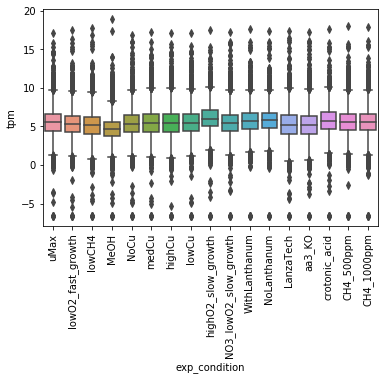

In [22]:
# melt ot make box plot
log_tpm_df_melt = pd.melt(log_tpm_df, id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
display(log_tpm_df_melt.head())

# box plot
sns.boxplot(data=log_tpm_df_melt,x="exp_condition",y="tpm")
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.show()

### normalize the log TPM df to uMax condition by subtracting uMax ave for each gene

In [23]:
# copy the log tpm df
log_norm_uMax = log_tpm_df.copy(deep=True)

for c in conds:
    log_norm_uMax[c] = log_norm_uMax[c].values - log_tpm_df['uMax'].values

    
log_norm_uMax

,locus_tag,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,NO3_lowO2_slow_growth,WithLanthanum,NoLanthanum,LanzaTech,aa3_KO,crotonic_acid,CH4_500ppm,CH4_1000ppm
0,EQU24_RS00005,0.0,-0.362618,-0.581771,-0.938368,-0.333441,-0.080654,-0.072688,-0.184800,0.490442,-0.548593,-0.451075,-0.514151,-0.850152,-0.806044,-0.275339,0.335178,-0.118289
1,EQU24_RS00010,0.0,-0.308455,-0.672562,-1.453589,-0.179318,0.238997,0.431704,0.095847,0.890543,-0.314633,-0.424111,-0.340752,0.057861,-0.258394,-0.046629,-0.641635,-0.669391
2,EQU24_RS00015,0.0,-0.154412,-0.703710,-0.712489,-0.364849,-0.077025,0.022728,-0.173727,0.576089,-0.518837,-0.613860,-0.431182,-1.352185,-1.355155,0.116774,-0.220382,-0.604362
3,EQU24_RS00020,0.0,-0.394512,-0.564442,-1.793775,-0.487146,-0.000668,0.084802,-0.150800,0.315533,-0.051993,-0.230444,-0.197811,0.272944,-0.212111,0.271885,-0.304430,-0.081434
4,EQU24_RS00035,0.0,-0.067476,-0.057513,-0.768757,-0.193539,-0.004144,0.151546,-0.021959,0.326576,-0.454286,0.449744,0.372858,-1.145922,-0.659053,-0.184008,0.173500,0.501606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,EQU24_RS23155,0.0,0.141524,-0.378390,-2.176226,-0.609995,-0.455966,-0.126416,-0.519090,-0.984483,0.811921,0.342960,0.938387,0.091461,0.963155,0.151215,-0.176070,0.095209
4185,EQU24_RS23160,0.0,0.169579,-0.202920,-1.540591,-0.492905,-0.298688,0.015508,-0.188162,-0.806085,0.751013,-0.327272,0.293420,0.398035,0.680786,0.048804,-0.323787,0.050607
4186,EQU24_RS23165,0.0,0.130725,-0.371696,-2.154411,-0.605448,-0.433509,-0.119416,-0.496754,-0.927885,0.801344,0.294235,0.837039,0.103283,0.914963,0.164196,-0.573188,-0.299631
4187,EQU24_RS23170,0.0,-0.362006,-0.865818,-0.444302,-0.604488,-0.619141,-0.375387,-0.701057,-0.446698,-0.875024,-0.837649,-0.497355,-0.339297,-1.474860,0.209592,-0.850040,-0.889990


,locus_tag,exp_condition,tpm
0,EQU24_RS00005,uMax,0.0
1,EQU24_RS00010,uMax,0.0
2,EQU24_RS00015,uMax,0.0
3,EQU24_RS00020,uMax,0.0
4,EQU24_RS00035,uMax,0.0


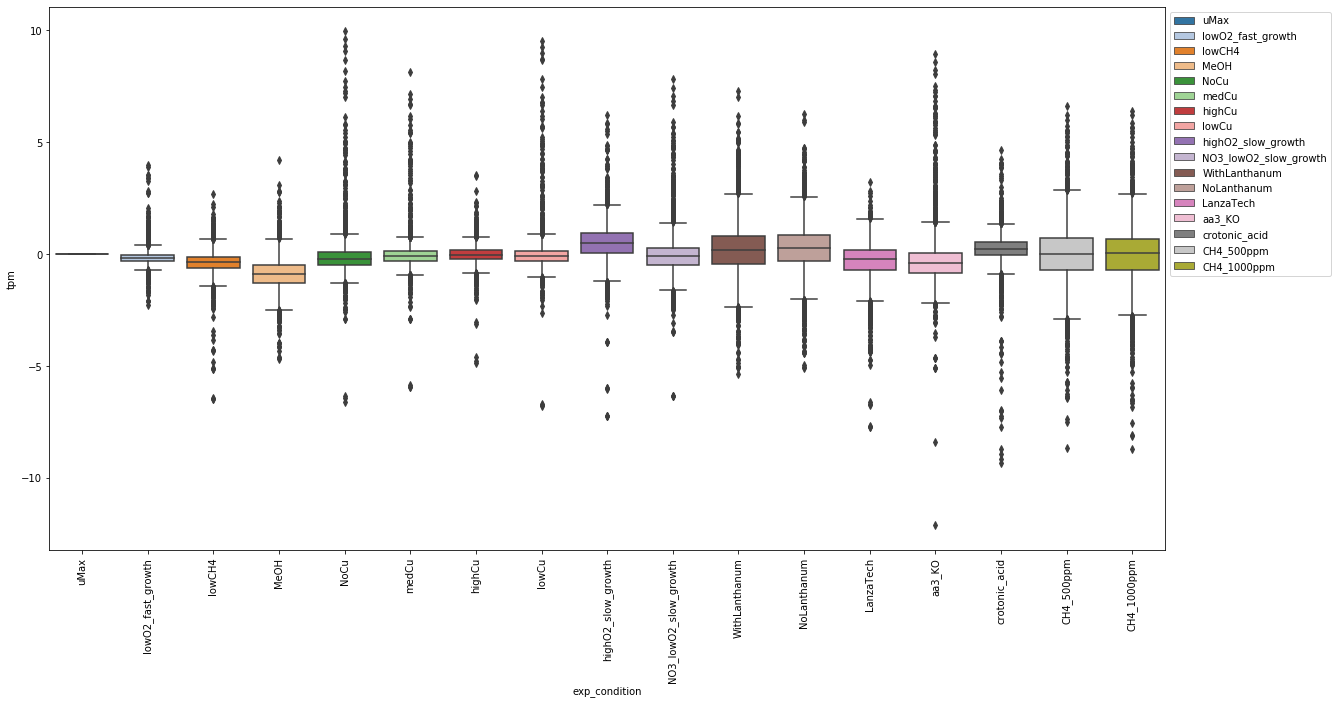

In [24]:
# check a quick boxplot of log normed tpm data
log_norm_uMax_melt = pd.melt(log_norm_uMax[["locus_tag"]+conds], id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
#log_norm_uMax_melt['cond'] = log_norm_uMax_melt['exp_condition'].apply(lambda x: sample2cond[x])
display(log_norm_uMax_melt.head())

fig = plt.figure(figsize=(20,10))
sns.boxplot(data=log_norm_uMax_melt,x="exp_condition",y="tpm",hue='exp_condition',dodge=False,palette='tab20')
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [25]:
# save the log normalized to uMax data
log_norm_uMax.to_csv('data/log_norm_uMax_by_cond_lowExAdj_20221031.csv',index=False)

### Which genes were up regulated in 500ppm?

In [26]:
log_norm_uMax

,locus_tag,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,NO3_lowO2_slow_growth,WithLanthanum,NoLanthanum,LanzaTech,aa3_KO,crotonic_acid,CH4_500ppm,CH4_1000ppm
0,EQU24_RS00005,0.0,-0.362618,-0.581771,-0.938368,-0.333441,-0.080654,-0.072688,-0.184800,0.490442,-0.548593,-0.451075,-0.514151,-0.850152,-0.806044,-0.275339,0.335178,-0.118289
1,EQU24_RS00010,0.0,-0.308455,-0.672562,-1.453589,-0.179318,0.238997,0.431704,0.095847,0.890543,-0.314633,-0.424111,-0.340752,0.057861,-0.258394,-0.046629,-0.641635,-0.669391
2,EQU24_RS00015,0.0,-0.154412,-0.703710,-0.712489,-0.364849,-0.077025,0.022728,-0.173727,0.576089,-0.518837,-0.613860,-0.431182,-1.352185,-1.355155,0.116774,-0.220382,-0.604362
3,EQU24_RS00020,0.0,-0.394512,-0.564442,-1.793775,-0.487146,-0.000668,0.084802,-0.150800,0.315533,-0.051993,-0.230444,-0.197811,0.272944,-0.212111,0.271885,-0.304430,-0.081434
4,EQU24_RS00035,0.0,-0.067476,-0.057513,-0.768757,-0.193539,-0.004144,0.151546,-0.021959,0.326576,-0.454286,0.449744,0.372858,-1.145922,-0.659053,-0.184008,0.173500,0.501606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,EQU24_RS23155,0.0,0.141524,-0.378390,-2.176226,-0.609995,-0.455966,-0.126416,-0.519090,-0.984483,0.811921,0.342960,0.938387,0.091461,0.963155,0.151215,-0.176070,0.095209
4185,EQU24_RS23160,0.0,0.169579,-0.202920,-1.540591,-0.492905,-0.298688,0.015508,-0.188162,-0.806085,0.751013,-0.327272,0.293420,0.398035,0.680786,0.048804,-0.323787,0.050607
4186,EQU24_RS23165,0.0,0.130725,-0.371696,-2.154411,-0.605448,-0.433509,-0.119416,-0.496754,-0.927885,0.801344,0.294235,0.837039,0.103283,0.914963,0.164196,-0.573188,-0.299631
4187,EQU24_RS23170,0.0,-0.362006,-0.865818,-0.444302,-0.604488,-0.619141,-0.375387,-0.701057,-0.446698,-0.875024,-0.837649,-0.497355,-0.339297,-1.474860,0.209592,-0.850040,-0.889990


In [27]:
# merge the tpm df info cols with the log normed TPMs
comb = log_norm_uMax.merge(tpm_df[info_cols], on='locus_tag')
comb

,locus_tag,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,...,LanzaTech,aa3_KO,crotonic_acid,CH4_500ppm,CH4_1000ppm,product,type,gene_symbol,start_coord,end_coord
0,EQU24_RS00005,0.0,-0.362618,-0.581771,-0.938368,-0.333441,-0.080654,-0.072688,-0.184800,0.490442,...,-0.850152,-0.806044,-0.275339,0.335178,-0.118289,chromosomal replication initiator protein DnaA,CDS,dnaA,0,1317
1,EQU24_RS00010,0.0,-0.308455,-0.672562,-1.453589,-0.179318,0.238997,0.431704,0.095847,0.890543,...,0.057861,-0.258394,-0.046629,-0.641635,-0.669391,DNA polymerase III subunit beta,CDS,dnaN,1502,2603
2,EQU24_RS00015,0.0,-0.154412,-0.703710,-0.712489,-0.364849,-0.077025,0.022728,-0.173727,0.576089,...,-1.352185,-1.355155,0.116774,-0.220382,-0.604362,DNA replication/repair protein RecF,CDS,recF,3060,4140
3,EQU24_RS00020,0.0,-0.394512,-0.564442,-1.793775,-0.487146,-0.000668,0.084802,-0.150800,0.315533,...,0.272944,-0.212111,0.271885,-0.304430,-0.081434,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,4185,6600
4,EQU24_RS00035,0.0,-0.067476,-0.057513,-0.768757,-0.193539,-0.004144,0.151546,-0.021959,0.326576,...,-1.145922,-0.659053,-0.184008,0.173500,0.501606,hypothetical protein,CDS,,7350,7734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4184,EQU24_RS23155,0.0,0.141524,-0.378390,-2.176226,-0.609995,-0.455966,-0.126416,-0.519090,-0.984483,...,0.091461,0.963155,0.151215,-0.176070,0.095209,3-hexulose-6-phosphate synthase,CDS,hxlA,4877662,4878310
4185,EQU24_RS23160,0.0,0.169579,-0.202920,-1.540591,-0.492905,-0.298688,0.015508,-0.188162,-0.806085,...,0.398035,0.680786,0.048804,-0.323787,0.050607,6-phospho-3-hexuloisomerase,CDS,hxlB,4882314,4882848
4186,EQU24_RS23165,0.0,0.130725,-0.371696,-2.154411,-0.605448,-0.433509,-0.119416,-0.496754,-0.927885,...,0.103283,0.914963,0.164196,-0.573188,-0.299631,3-hexulose-6-phosphate synthase,CDS,hxlA,4882851,4883499
4187,EQU24_RS23170,0.0,-0.362006,-0.865818,-0.444302,-0.604488,-0.619141,-0.375387,-0.701057,-0.446698,...,-0.339297,-1.474860,0.209592,-0.850040,-0.889990,transposase,CDS,,4918898,4919603


In [28]:
comb.sort_values(by='CH4_1000ppm',ascending=False)

,locus_tag,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,...,LanzaTech,aa3_KO,crotonic_acid,CH4_500ppm,CH4_1000ppm,product,type,gene_symbol,start_coord,end_coord
2003,EQU24_RS10990,0.0,0.268017,1.789519,0.044162,0.885156,0.730399,0.262140,1.307395,2.823706,...,1.510647,3.432761,1.890164,6.638546,6.415163,hypothetical protein,CDS,,2451743,2452298
223,EQU24_RS01215,0.0,-0.700194,0.027535,-0.153373,-0.071007,-0.287700,-0.530520,-0.150684,0.628619,...,0.374183,1.009469,1.344815,6.198006,6.213925,IS66 family transposase,CDS,,244910,246491
2004,EQU24_RS10995,0.0,0.553951,1.630498,-0.103874,0.906954,0.513726,0.170500,1.123111,2.910068,...,1.564391,3.345733,1.469370,6.009276,5.848408,HYR domain-containing protein,CDS,,2452409,2454107
3017,EQU24_RS16560,0.0,-0.507372,-0.200964,-0.694489,-1.298422,-0.630580,-3.019544,-1.110697,0.156516,...,-0.648392,0.725988,0.913771,5.500571,5.680051,IS66 family transposase,CDS,,3715697,3717278
2075,EQU24_RS11380,0.0,-1.006726,-0.935060,-0.320915,-1.036200,-1.171579,-3.146566,-0.713718,1.149888,...,-0.251164,1.206189,1.567364,5.513587,5.644534,IS66 family transposase,CDS,,2544773,2546354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,EQU24_RS18835,0.0,0.372965,-4.300823,-4.644588,-6.458234,-5.955278,-4.852668,-6.719862,-6.036762,...,-6.770256,-5.089751,-4.445733,-6.395571,-6.816308,,rRNA,,4207908,4208024
1042,EQU24_RS05645,0.0,0.117948,-1.330924,1.322618,-1.941224,0.108892,-0.707596,-0.606291,-2.241328,...,-4.741485,-3.717445,-2.767763,-6.447719,-7.551391,,tRNA,,1220955,1221031
698,EQU24_RS03790,0.0,-0.015637,-0.812047,-1.020289,-0.023271,0.489716,0.549866,0.257473,-0.550871,...,-1.181848,-1.460860,-0.804749,-7.378994,-8.108442,,tRNA,,810562,810636
1458,EQU24_RS07965,0.0,-0.384591,-0.440826,-0.060728,-1.515178,-0.224961,-0.521379,-1.333239,-1.369268,...,-3.787683,-3.539419,-1.914922,-7.487829,-8.149626,,tRNA,,1758864,1758940


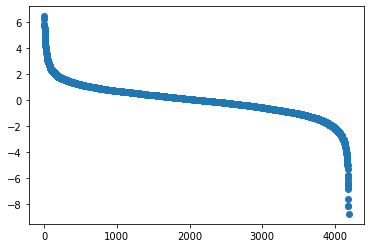

In [29]:
cond = 'CH4_1000ppm'
plt.scatter(x=range(comb.shape[0]), y=comb.sort_values(by=cond,ascending=False)[cond].values)

In [30]:
# loci that are >2 fold up in 1000ppm relative to uMax
rna_up_1000 = comb[(comb['CH4_1000ppm']>1)&(comb['type']!='CDS')].sort_values('CH4_1000ppm',ascending=False)
rna_up_1000

,locus_tag,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,...,LanzaTech,aa3_KO,crotonic_acid,CH4_500ppm,CH4_1000ppm,product,type,gene_symbol,start_coord,end_coord
3079,EQU24_RS16875,0.0,0.027176,-0.714659,0.479222,0.259032,0.556249,0.384850,0.578300,1.245155,...,-0.230175,-0.149015,0.075313,5.110557,4.451752,,tRNA,,3790737,3790814
254,EQU24_RS01370,0.0,-0.133966,0.579317,0.368329,-0.061345,0.060402,-0.336676,-0.105823,0.953272,...,-0.398075,0.336903,1.799041,3.647706,2.828795,,tRNA,,286272,286348
1763,EQU24_RS09685,0.0,0.142899,-1.148740,0.886047,0.466325,1.500656,1.027796,0.998170,0.456847,...,-1.956806,-0.076445,-0.610540,3.070937,2.780626,,tRNA,,2156224,2156315
1682,EQU24_RS09235,0.0,-0.240707,-1.153306,-0.022576,-0.984033,-0.305762,-0.331529,-0.610443,-0.603567,...,-2.729043,-0.481958,-0.568305,1.999338,1.485380,,ncRNA,,2044551,2044648


In [31]:
# loci that are >2 fold up in 500ppm relative to uMax
rna_up_500 = comb[(comb['CH4_500ppm']>1)&(comb['type']!='CDS')].sort_values('CH4_500ppm',ascending=False)
rna_up_500

,locus_tag,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,...,LanzaTech,aa3_KO,crotonic_acid,CH4_500ppm,CH4_1000ppm,product,type,gene_symbol,start_coord,end_coord
3079,EQU24_RS16875,0.0,0.027176,-0.714659,0.479222,0.259032,0.556249,0.384850,0.578300,1.245155,...,-0.230175,-0.149015,0.075313,5.110557,4.451752,,tRNA,,3790737,3790814
254,EQU24_RS01370,0.0,-0.133966,0.579317,0.368329,-0.061345,0.060402,-0.336676,-0.105823,0.953272,...,-0.398075,0.336903,1.799041,3.647706,2.828795,,tRNA,,286272,286348
1763,EQU24_RS09685,0.0,0.142899,-1.148740,0.886047,0.466325,1.500656,1.027796,0.998170,0.456847,...,-1.956806,-0.076445,-0.610540,3.070937,2.780626,,tRNA,,2156224,2156315
1682,EQU24_RS09235,0.0,-0.240707,-1.153306,-0.022576,-0.984033,-0.305762,-0.331529,-0.610443,-0.603567,...,-2.729043,-0.481958,-0.568305,1.999338,1.485380,,ncRNA,,2044551,2044648
385,EQU24_RS02110,0.0,-0.010723,-1.356693,-0.027290,0.499199,1.058186,0.621550,0.638184,-0.169307,...,-1.651334,-0.882828,-0.717324,1.239593,0.899043,,tRNA,,448719,448796
3440,EQU24_RS18860,0.0,-0.849493,-4.830793,-0.407441,0.084494,0.116422,0.583054,0.049072,-0.557481,...,-2.399729,0.482068,0.804758,1.133710,0.983987,,tRNA,,4213623,4213699
4029,EQU24_RS22130,0.0,-0.328224,-0.456442,-0.441322,-0.077495,0.238573,0.041845,-0.054432,0.497926,...,-1.508459,0.560824,0.649438,1.120272,0.947651,,tRNA,,4994558,4994648


In [32]:
locs500 = rna_up_500['locus_tag'].values
locs1000 = rna_up_1000['locus_tag'].values
set(locs500) - set(locs1000)

{'EQU24_RS02110', 'EQU24_RS18860', 'EQU24_RS22130'}

In [33]:
rna_df = rna_up_500[info_cols+['CH4_1000ppm','CH4_500ppm']].rename(columns =
    {'CH4_1000ppm':'CH4_1000ppm_LRuMax',
     'CH4_500ppm':'CH4_500ppm_LRuMax'
    })
rna_df

,locus_tag,product,type,gene_symbol,start_coord,end_coord,CH4_1000ppm_LRuMax,CH4_500ppm_LRuMax
3079,EQU24_RS16875,,tRNA,,3790737,3790814,4.451752,5.110557
254,EQU24_RS01370,,tRNA,,286272,286348,2.828795,3.647706
1763,EQU24_RS09685,,tRNA,,2156224,2156315,2.780626,3.070937
1682,EQU24_RS09235,,ncRNA,,2044551,2044648,1.485380,1.999338
385,EQU24_RS02110,,tRNA,,448719,448796,0.899043,1.239593
3440,EQU24_RS18860,,tRNA,,4213623,4213699,0.983987,1.133710
4029,EQU24_RS22130,,tRNA,,4994558,4994648,0.947651,1.120272


### Also pull out the mean tpms for the columsn of interest

In [35]:
# lim_CH4_samples = ['5GB1C_CH4_500ppm-Rep1_tpm',
#                    '5GB1C_CH4_500ppm-Rep2_tpm',
#                    '5GB1C_CH4_1000ppm-Rep1_tpm',
#                    '5GB1C_CH4_1000ppm-Rep2_tpm']
# lim_CH4_tpms = tpm_df[tpm_df['locus_tag'].isin(locs500)][['locus_tag']+lim_CH4_samples]
# lim_CH4_tpms

desired_tpm_cols = ['CH4_1000ppm','CH4_500ppm','uMax']
lim_CH4_tpms = tpm_meansT[tpm_meansT['locus_tag'].isin(locs500)][['locus_tag']+desired_tpm_cols]
lim_CH4_tpms

exp_condition,locus_tag,CH4_1000ppm,CH4_500ppm,uMax
254,EQU24_RS01370,168.469692,297.200670,23.703484
385,EQU24_RS02110,56.858048,71.998587,30.485064
1682,EQU24_RS09235,1065.430291,1521.399030,380.516719
1763,EQU24_RS09685,1015.368590,1241.700264,147.756541
3079,EQU24_RS16875,2648.383427,4181.204939,121.014028
3440,EQU24_RS18860,1006.253554,1116.294347,508.737157
4029,EQU24_RS22130,50.427460,56.838295,26.140619


### Combine the Log Ratio values df with the tpms df

In [36]:
final_rna_df = rna_df.merge(lim_CH4_tpms, on='locus_tag').rename(columns =
    {'CH4_1000ppm':'CH4_1000ppm_ave_tpm',
     'CH4_500ppm':'CH4_500ppm_ave_tpm',
     'uMax':'uMax_ave_tpm'
    })
final_rna_df

,locus_tag,product,type,gene_symbol,start_coord,end_coord,CH4_1000ppm_LRuMax,CH4_500ppm_LRuMax,CH4_1000ppm_ave_tpm,CH4_500ppm_ave_tpm,uMax_ave_tpm
0,EQU24_RS16875,,tRNA,,3790737,3790814,4.451752,5.110557,2648.383427,4181.204939,121.014028
1,EQU24_RS01370,,tRNA,,286272,286348,2.828795,3.647706,168.469692,297.200670,23.703484
2,EQU24_RS09685,,tRNA,,2156224,2156315,2.780626,3.070937,1015.368590,1241.700264,147.756541
3,EQU24_RS09235,,ncRNA,,2044551,2044648,1.485380,1.999338,1065.430291,1521.399030,380.516719
4,EQU24_RS02110,,tRNA,,448719,448796,0.899043,1.239593,56.858048,71.998587,30.485064
5,EQU24_RS18860,,tRNA,,4213623,4213699,0.983987,1.133710,1006.253554,1116.294347,508.737157
6,EQU24_RS22130,,tRNA,,4994558,4994648,0.947651,1.120272,50.427460,56.838295,26.140619


In [37]:
np.log2(56.848295/26.150619)

1.1202719840188937

### Add the sequence back on

In [38]:
final_rna_df['seq'] = final_rna_df['locus_tag'].apply(lambda x: str(loc2info[x]['seq']))
final_rna_df

,locus_tag,product,type,gene_symbol,start_coord,end_coord,CH4_1000ppm_LRuMax,CH4_500ppm_LRuMax,CH4_1000ppm_ave_tpm,CH4_500ppm_ave_tpm,uMax_ave_tpm,seq
0,EQU24_RS16875,,tRNA,,3790737,3790814,4.451752,5.110557,2648.383427,4181.204939,121.014028,GCCCCGGTAGCTCAGCTGGATAGAGCATCCCCCTCCTAAGGGGAAG...
1,EQU24_RS01370,,tRNA,,286272,286348,2.828795,3.647706,168.469692,297.200670,23.703484,GCCGATGTAGCTCAGCTGGTAGAGCAACTGATTCGTAATCAGTAGG...
2,EQU24_RS09685,,tRNA,,2156224,2156315,2.780626,3.070937,1015.368590,1241.700264,147.756541,GGAGAGATGGCTGAGTGGTTTAAGGCAGCGGTCTTGAAAACCGTCG...
3,EQU24_RS09235,,ncRNA,,2044551,2044648,1.485380,1.999338,1065.430291,1521.399030,380.516719,TGTCGGTCCTCCCGCAACGATACGCTGTAAACCCCGCCAGGCCCGG...
4,EQU24_RS02110,,tRNA,,448719,448796,0.899043,1.239593,56.858048,71.998587,30.485064,GCGCCCGTAGCTCAGCTGGATAGAGCGCGGCCCTCCGGAGGCCGAG...
5,EQU24_RS18860,,tRNA,,4213623,4213699,0.983987,1.133710,1006.253554,1116.294347,508.737157,GCCTAGGTAGCTCAGTCGGTAGAGCAGAGGACTGAAAATCCTCGTG...
6,EQU24_RS22130,,tRNA,,4994558,4994648,0.947651,1.120272,50.427460,56.838295,26.140619,GGAGGGATGCCGGAGAGGCTGAACGGCCCTGACTCGAAATCAGTGG...


In [40]:
final_rna_df.to_csv('data/rna_up_500.tsv',sep='\t',index=False)

In [54]:
set(final_rna_df['locus_tag'])

{'EQU24_RS01370',
 'EQU24_RS02110',
 'EQU24_RS09235',
 'EQU24_RS09685',
 'EQU24_RS16875',
 'EQU24_RS18860',
 'EQU24_RS22130'}

In [ ]:
{'EQU24_RS01370',
 'EQU24_RS02110',
 'EQU24_RS09235',
 'EQU24_RS09685',
 'EQU24_RS16875',

 'EQU24_RS06320',
}

In [60]:
comb[comb['locus_tag']=='EQU24_RS06320']

,locus_tag,uMax,lowO2_fast_growth,lowCH4,MeOH,NoCu,medCu,highCu,lowCu,highO2_slow_growth,...,LanzaTech,aa3_KO,crotonic_acid,CH4_500ppm,CH4_1000ppm,product,type,gene_symbol,start_coord,end_coord
1164,EQU24_RS06320,0.0,-0.239979,-1.254875,-0.349009,0.687432,1.110878,0.922253,0.578417,-0.486857,...,-2.220887,-1.522251,-0.828546,0.844486,0.791999,,tRNA,,1382115,1382202


# Actually view normalized TPMs by gene group

In [32]:
# Mary's request to sort by growth rate
priority = {
     "uMax": 1,
     "MeOH": 2,
     "NoCu": 3,
     "lowCu": 4,
     "medCu": 5,
     "highCu": 6,
     "LanzaTech": 7,
     "lowCH4": 8,
     "lowO2_fast_growth": 9,
     "aa3_KO": 10,
     "NO3_lowO2_slow_growth": 11,
     "highO2_slow_growth": 12,
     "CH4_500ppm":13,
     "CH4_1000ppm":14,
     "WithLanthanum": 15,
     "NoLanthanum": 16,
     "crotonic_acid": 17,
}

exp_order = [
     "uMax",
     "MeOH",
     "NoCu",
     "lowCu",
     "medCu",
     "highCu",
     "LanzaTech",
     "lowCH4",
     "lowO2_fast_growth",
     "aa3_KO",
     "NO3_lowO2_slow_growth",
     "highO2_slow_growth",
     "CH4_500ppm",
     "CH4_1000ppm",
     "WithLanthanum",
     "NoLanthanum",
     "crotonic_acid",
]

In [33]:
# make a bar chart for a gene activity
df = log_norm_uMax.set_index('locus_tag').T.reset_index().rename(columns={'index':'sample'})
df['exp_condition'] = df['sample'].apply(lambda x: sample2cond[x])
df['exp_order'] = df['exp_condition'].apply(lambda x: priority[x])

df

locus_tag,sample,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,EQU24_RS00050,EQU24_RS00055,...,EQU24_RS23140,EQU24_RS23145,EQU24_RS23150,EQU24_RS23155,EQU24_RS23160,EQU24_RS23165,EQU24_RS23170,EQU24_RS23175,exp_condition,exp_order
0,5GB1_FM03_TR1_QC_tpm,-0.601044,-0.733380,-0.516520,-0.649819,-1.256002,-0.557333,-0.216755,-0.481266,-0.167167,...,-1.024546,-1.266505,-0.964596,-1.182842,-1.071488,-1.215895,-1.173202,-1.188843,uMax,1
1,5GB1_FM03_TR2_QC_tpm,0.047941,-0.080914,-0.140261,0.075143,-0.200434,-0.077496,0.163021,-0.036885,-0.493976,...,-0.427060,-0.710534,-0.456171,-0.681158,-0.408048,-0.674851,-0.479158,-0.517788,uMax,1
2,5GB1_FM11_TR1_QC_tpm,-1.049614,-0.721494,-0.683805,-0.458800,-0.556848,-1.187402,-1.156092,-0.524245,-0.442488,...,-0.615735,-0.824296,-0.652643,-0.856980,-0.586230,-0.775278,-0.660534,0.394865,lowO2_fast_growth,9
3,5GB1_FM11_TR2_QC_tpm,-0.502454,-0.506424,-0.216384,-0.283088,-0.335072,-0.289866,-0.519137,-0.222013,-0.498583,...,-0.209264,-0.511975,-0.238079,-0.542305,-0.212027,-0.497317,-0.686634,0.076057,lowO2_fast_growth,9
4,5GB1_FM12_TR1_tpm,-0.649416,-0.900744,-0.810810,-0.723023,0.071070,-0.035000,-0.446598,-0.370131,-0.002611,...,-0.273341,-0.353450,-0.288136,-0.361015,-0.274943,-0.351439,-0.831201,-0.763535,lowCH4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,5GB1C-JG15-N-BR2_tpm,-0.280948,-0.124955,-0.136621,-0.004456,0.897642,0.801453,0.170924,0.094229,0.481262,...,0.216102,1.306288,0.223497,1.281384,0.216956,1.170250,-0.237397,-2.353067,NoLanthanum,16
82,5GB1C_CH4_500ppm-Rep1_tpm,0.399464,-0.597569,-0.092184,-0.288024,0.317582,-0.831272,-0.625782,-0.186804,-0.431571,...,-0.277920,-0.090994,-0.294946,-0.113170,-0.276585,-0.490622,-0.595719,-2.595061,CH4_500ppm,13
83,5GB1C_CH4_500ppm-Rep2_tpm,0.373487,-0.565058,-0.258713,-0.198564,0.251670,-0.846597,-0.627267,-0.059631,-0.778374,...,-0.212000,-0.026477,-0.231675,-0.048651,-0.205287,-0.459552,-0.955076,-2.804045,CH4_500ppm,13
84,5GB1C_CH4_1000ppm-Rep1_tpm,-0.284211,-0.721821,-0.736253,-0.117120,0.437081,-0.765114,-0.425505,0.049969,-0.319712,...,0.083911,0.188452,0.072601,0.175033,0.090771,-0.224727,-0.862541,-3.523849,CH4_1000ppm,14


In [34]:
log_norm_uMax_means['exp_order'] = log_norm_uMax_means['exp_condition'].apply(lambda x: priority[x])
log_norm_uMax_means

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,EQU24_RS00050,EQU24_RS00055,...,EQU24_RS23135,EQU24_RS23140,EQU24_RS23145,EQU24_RS23150,EQU24_RS23155,EQU24_RS23160,EQU24_RS23165,EQU24_RS23170,EQU24_RS23175,exp_order
0,CH4_1000ppm,-8.117298e-02,-0.613072,-5.669396e-01,-2.269307e-02,6.035278e-01,-7.124312e-01,-3.909706e-01,1.149000e-01,-2.498263e-01,...,2.143358e-01,1.270989e-01,2.057890e-01,1.163454e-01,1.906451e-01,1.332729e-01,-2.016311e-01,-8.053208e-01,-3.243802e+00,14
1,CH4_500ppm,3.864757e-01,-0.581313,-1.754483e-01,-2.432939e-01,2.846261e-01,-8.389345e-01,-6.265244e-01,-1.232175e-01,-6.049726e-01,...,-5.632588e-02,-2.449597e-01,-5.873515e-02,-2.633104e-01,-8.091053e-02,-2.409356e-01,-4.750868e-01,-7.753973e-01,-2.699553e+00,13
2,LanzaTech,-8.000146e-01,0.113484,-1.305931e+00,3.346018e-01,-1.037139e+00,4.832193e-01,6.142637e-01,7.701552e-01,6.599340e-01,...,1.804464e-01,4.620897e-01,1.791900e-01,4.651827e-01,1.859070e-01,4.812533e-01,2.007601e-01,-2.559111e-01,-3.340955e-01,7
3,MeOH,-8.915541e-01,-1.403253,-6.705917e-01,-1.748612e+00,-6.646240e-01,-9.387229e-01,-1.121010e+00,-7.234791e-01,-7.365353e-01,...,-2.099029e+00,-1.472358e+00,-2.094369e+00,-1.475978e+00,-2.101176e+00,-1.470884e+00,-2.079524e+00,-3.659764e-01,1.661249e-01,2
4,NO3_lowO2_slow_growth,-5.063457e-01,-0.264002,-4.810428e-01,4.020358e-03,-3.445083e-01,-1.523231e-01,-6.393280e-02,-1.492311e-01,-1.055436e-01,...,9.124425e-01,8.309478e-01,9.150956e-01,8.151287e-01,9.044667e-01,8.306533e-01,8.967525e-01,-8.054283e-01,-8.591081e-01,11
5,NoCu,-4.396529e-01,-0.209007,-4.692995e-01,-5.223090e-01,-2.788055e-01,7.043413e-01,8.453355e-01,4.215533e-01,5.551800e-01,...,-5.925837e-01,-4.966195e-01,-6.100133e-01,-5.126789e-01,-6.012962e-01,-5.047228e-01,-5.955785e-01,-6.681774e-01,-1.099944e-01,3
6,NoLanthanum,-4.930955e-01,-0.296572,-3.912499e-01,-1.659828e-01,3.003718e-01,6.253483e-01,2.895031e-01,1.208882e-01,5.183104e-01,...,9.631078e-01,3.619424e-01,9.631511e-01,3.519119e-01,9.569764e-01,3.711382e-01,8.663079e-01,-4.638109e-01,-2.716110e+00,16
7,WithLanthanum,-4.347292e-01,-0.402136,-6.073361e-01,-2.160511e-01,4.064436e-01,4.943045e-01,1.709418e-01,6.709564e-02,3.592410e-01,...,3.977151e-01,-2.667932e-01,3.749088e-01,-2.725897e-01,3.542166e-01,-2.579611e-01,3.151877e-01,-7.868791e-01,-1.929767e+00,15
8,aa3_KO,-7.596458e-01,-0.198740,-1.350340e+00,-1.515829e-01,-5.652774e-01,1.981753e-01,6.689269e-01,2.941344e-01,3.255052e-01,...,1.044067e+00,7.558055e-01,1.043967e+00,7.305813e-01,1.047063e+00,7.544730e-01,1.001053e+00,-1.389402e+00,-1.483936e+00,10
9,crotonic_acid,-2.239888e-01,0.013783,1.620560e-01,3.326662e-01,-7.552875e-02,7.679064e-01,1.206983e+00,1.181648e+00,1.271380e+00,...,2.510206e-01,1.363360e-01,2.520090e-01,1.249810e-01,2.428353e-01,1.296052e-01,2.590461e-01,2.825083e-01,1.649294e-01,17


In [35]:
color_dict = {
    'uMax':'#d9d9d9', #gray
    'NoCu':'#bdd7e7', #blues
    'lowCu':'#6baed6', #blues
    'medCu':'#3182bd', #blues
    'highCu':'#08519c', #blues
    'lowCH4':'#b3de69', #green
    'WithLanthanum':'#e6550d', #orange
    'NoLanthanum':'#fdbe85', #orange
    'MeOH':'#fb8072', #red
    'highO2_slow_growth':'#6a3d9a',
    'NO3_lowO2_slow_growth':'#bc80bd', #purple
    'lowO2_fast_growth':'#fccde5', #pink
    'LanzaTech':'#33a02c', #green
    'aa3_KO':'#e6f598', #light green
    'crotonic_acid':'#fee08b', #yellow
    'CH4_500ppm':'#99d8c9', #teal
    'CH4_1000ppm':'#66c2a4', #darker teal
}
color_domain = exp_order
color_range = [alt.HexColor(color_dict[x]) for x in exp_order]

In [36]:
def make_bars(df_means,locus,final=False):
    gene_note = loc2gene_note[locus]
    y_ax_title = [f'{locus}',f'{gene_note}']
    
    small_df = df_means[['exp_condition','exp_order',locus]]
    bars = alt.Chart(small_df).mark_bar().encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(
                title='',
                labels=True if final else False,
            )
        ),
        y=alt.Y(
            f"{locus}:Q",
            axis=alt.Axis(title=y_ax_title)
        ),
        color = alt.Color('exp_condition',
                           scale=alt.Scale(
                               domain=color_domain,
                               range=color_range
                               )
                         ),
        tooltip=['exp_condition'],
    ).properties(
        width=600,
        height=100
    )
    
    return bars

def make_dots(df, locus):
    small_df = df[['sample','exp_condition','exp_order',locus]]
    dots = alt.Chart(df).mark_circle(color='black').encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(title='',labels=False)
        ),
        y=alt.Y(
            f"{locus}:Q",
            #axis=alt.Axis(title=[f'{locus}'])
        ),tooltip = ['exp_condition:N','sample:N']

    ).properties(
        width=600,
        height=100
    )
    
    return dots

def make_gene_activity(df, df_means, locus,final=False):
    b = make_bars(df_means, locus,final=final)
    d = make_dots(df,locus)
    
    c = (b+d).resolve_scale(x='independent')

    return c

In [37]:
def create_stacked_activities_chart(log_df, log_df_means,loci,cmetab_group):
    final = False
    chart_list = []
    for i,locus in enumerate(loci):
        print("making chart for", locus)
        if i==len(loci)-1:
            final = True
            print("Final!")
        new_c = make_gene_activity(log_df, log_df_means, locus, final=final)
        chart_list.append(new_c)
        
    chart = alt.vconcat(*chart_list).resolve_scale(
        x='shared',
        #y='shared'
    ).properties(
        title=cmetab_group
    ).configure_title(
        fontSize=40,
        font='Courier',
    )
    chart.save(f"alt_out/{cmetab_group}.html")
    
    #return chart
    

In [39]:
cm_group = 'CH3OH_Ox'
loci = cm_df[cm_df['cmetab']==cm_group]['locus_tag'].values[:5]
create_stacked_activities_chart(df, log_norm_uMax_means, loci,cm_group)

making chart for EQU24_RS18155
making chart for EQU24_RS18145
making chart for EQU24_RS18150
making chart for EQU24_RS18155
making chart for EQU24_RS18160
Final!


In [38]:
# make stacked chart for each gruop of central metabolism
#for cm_group in cm_df['cmetab'].unique():
for cm_group in ['Glycolysis','TCA_cycle']:
    print(f"__{cm_group}__")
    loci = cm_df[cm_df['cmetab']==cm_group]['locus_tag'].values
    create_stacked_activities_chart(df, log_norm_uMax_means, loci,cm_group)

__Glycolysis__
making chart for EQU24_RS15285
making chart for EQU24_RS20710
making chart for EQU24_RS21560
making chart for EQU24_RS09515
making chart for EQU24_RS13315
making chart for EQU24_RS15280
making chart for EQU24_RS21635
making chart for EQU24_RS21640
making chart for EQU24_RS18895
making chart for EQU24_RS09840
making chart for EQU24_RS03055
making chart for EQU24_RS03480
making chart for EQU24_RS06435
making chart for EQU24_RS00585
making chart for EQU24_RS06090
making chart for EQU24_RS06095
making chart for EQU24_RS04150
Final!
__TCA_cycle__
making chart for EQU24_RS08320
making chart for EQU24_RS08335
making chart for EQU24_RS21340
making chart for EQU24_RS04215
making chart for EQU24_RS04220
making chart for EQU24_RS11680
making chart for EQU24_RS21775
making chart for EQU24_RS06010
making chart for EQU24_RS06015
making chart for EQU24_RS11660
making chart for EQU24_RS11665
making chart for EQU24_RS11670
making chart for EQU24_RS06965
making chart for EQU24_RS06970
mak

In [129]:
# can I do a repeat chart? 

In [137]:
def make_bars_rep(df_means,loci):
    bars = alt.Chart(df_means).mark_bar().encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(title='condition')
        ),
        y=alt.Y(
            alt.repeat('row'),
            type='quantitative'
        ),
        color = alt.Color('exp_condition',
                           scale=alt.Scale(
                               domain=color_domain,
                               range=color_range
                               )
                         )
    ).properties(
        width=600,
        height=100
    ).repeat(
        row=loci
    )
    
    return bars

def make_dots_rep(df, loci):
    dots = alt.Chart(df).mark_circle(color='black').encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(title='',labels=False)
        ),
        y=alt.Y(
            alt.repeat('row'),
            type='quantitative'
        ),tooltip = ['sample:N']

    ).properties(
        width=600,
        height=100
    ).repeat(
        row=loci
    )
    
    return dots

In [139]:
loci = list(ch4ox['locus_tag'].values)
br = make_bars_rep(log_norm_uMax_means,loci)
dr = make_dots_rep(df,loci)

In [140]:
br+dr

ValueError: Repeat charts cannot be layered.

In [133]:
list(ch4ox['locus_tag'].values[:2])

['EQU24_RS19315', 'EQU24_RS19310']